In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb 
# Size the plot appropriately for online display
plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [2]:
types = {'StateHoliday': np.dtype(str)}
train = pd.read_csv("C:\\Users\\Sneha\\Downloads\\train.csv", parse_dates=[2], nrows=66901, dtype=types)
store = pd.read_csv("C:\\Users\\Sneha\\Downloads\\store.csv")

In [3]:
not_open = train[(train['Open'] == 0) & (train['Sales'] != 0)]
print("No closed store with sales: " + str(not_open.size == 0))

No closed store with sales: True


In [4]:
no_sales = train[(train['Open'] == 1) & (train['Sales'] <= 0)]
print("No open store with no sales: " + str(no_sales.size == 0))

No open store with no sales: True


In [5]:
train = train.loc[train['Sales'] > 0]
assert(train[train['Sales'] == 0].size == 0)

In [6]:
dates = pd.to_datetime(train['Date'], format="%Y%m%d:%H:%M:%S.%f").sort_values()
dates = dates.unique()
start_date = dates[0]
end_date = dates[-1]
print("Start date: ", start_date)
print("End Date: ", end_date)
date_range = pd.date_range(start_date, end_date).values
assert(all(dates == date_range))

Start date:  2014-11-26T00:00:00.000000000
End Date:  2015-01-30T00:00:00.000000000


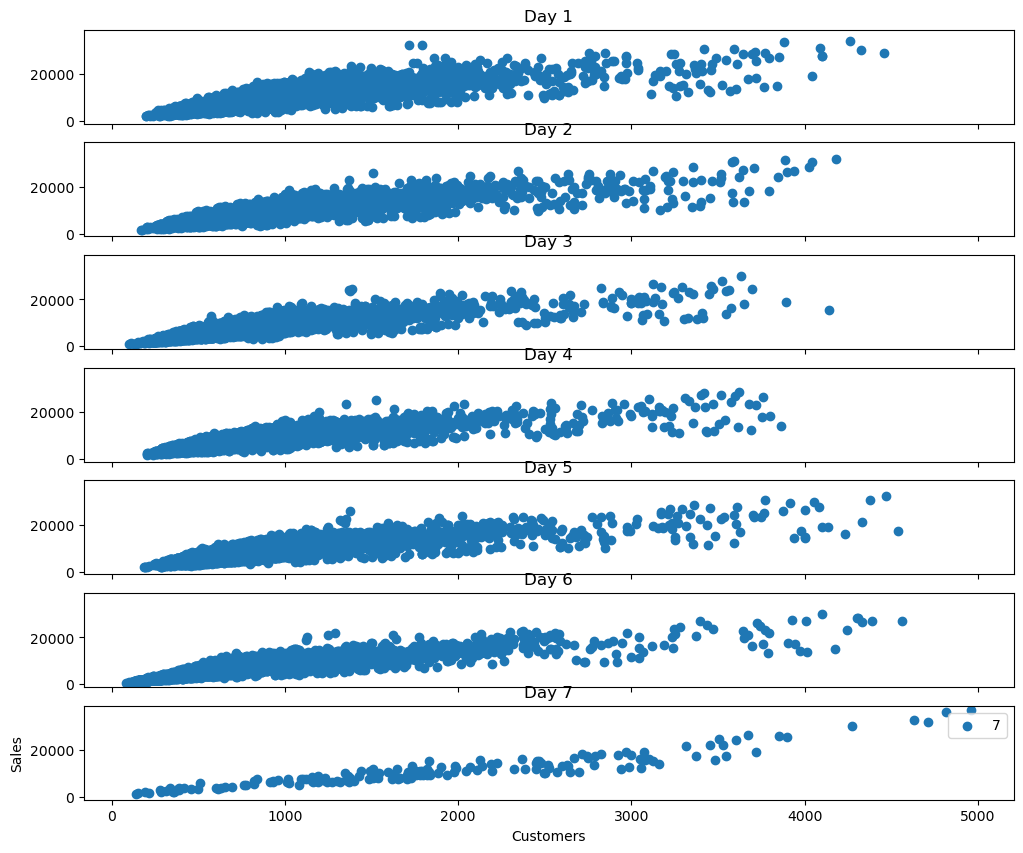

In [7]:

f, ax = plt.subplots(7, sharex=True, sharey=True)
for i in range(1, 8):
    mask = train[train['DayOfWeek'] == i]
    ax[i - 1].set_title("Day {0}".format(i))
    ax[i - 1].scatter(mask['Customers'], mask['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

C:\Users\Sneha\AppData\Local\Temp\ipykernel_19112\1911458931.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(train['Customers'], train['Sales'], c=train['DayOfWeek'], alpha=0.7, cmap=plt.cm.get_cmap('viridis'))


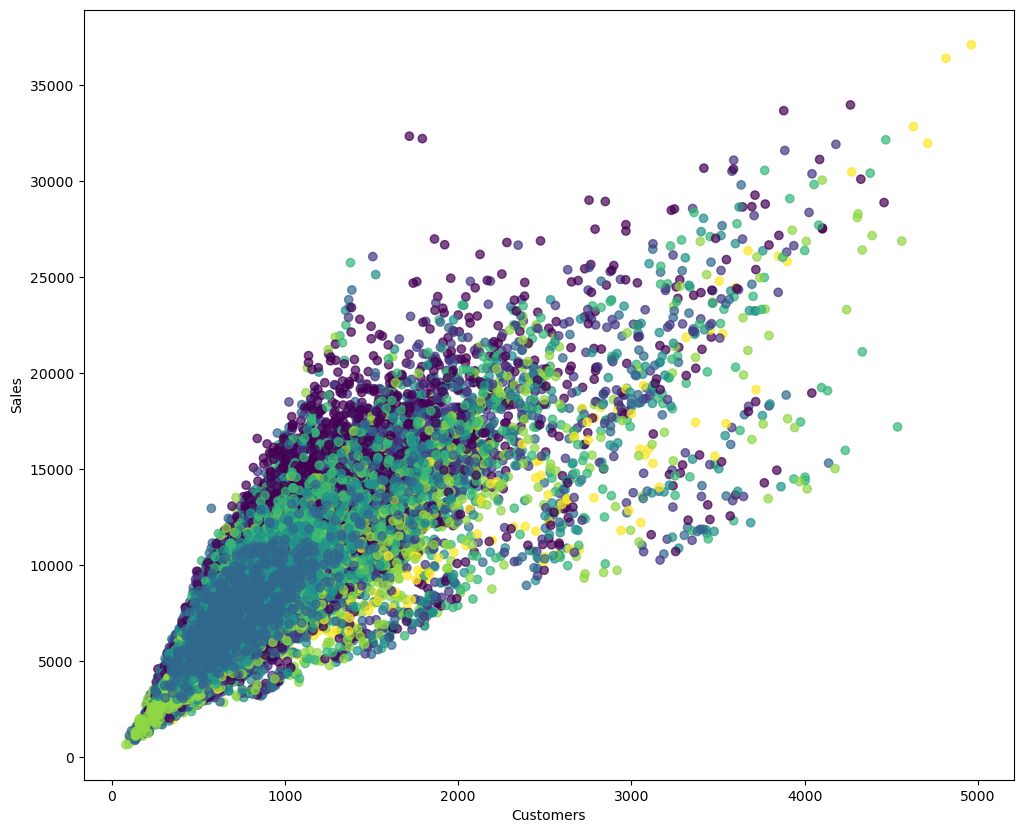

In [8]:
plt.scatter(train['Customers'], train['Sales'], c=train['DayOfWeek'], alpha=0.7, cmap=plt.cm.get_cmap('viridis'))

plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

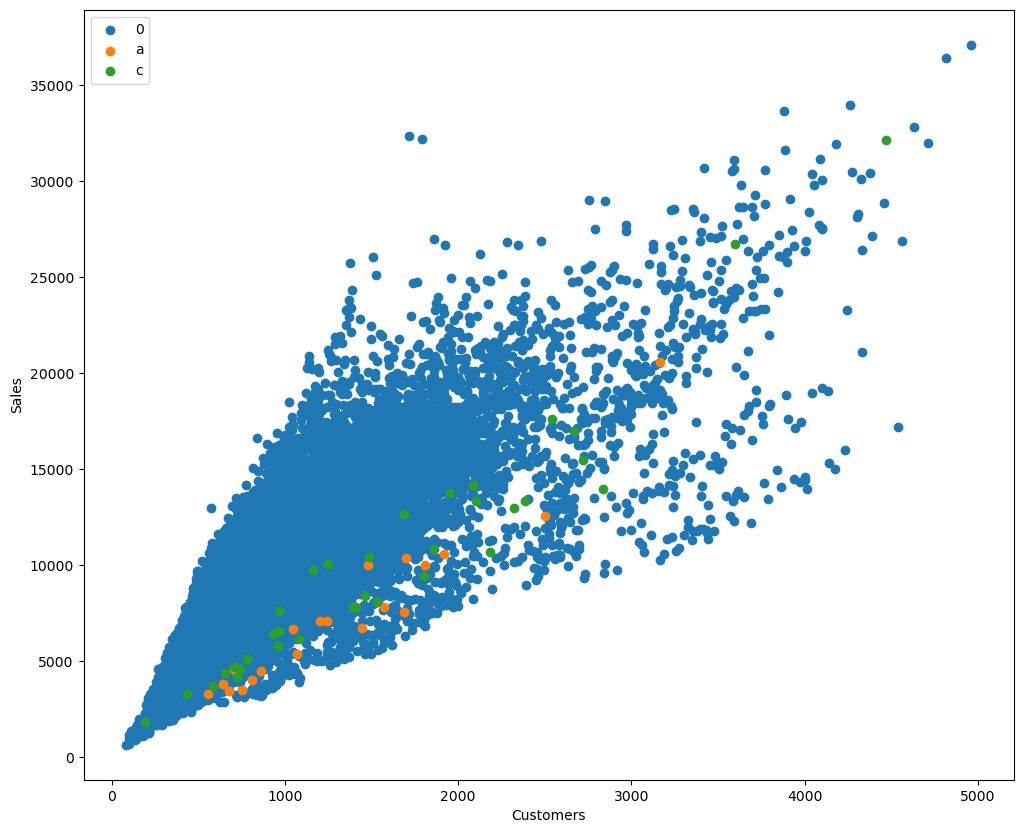

In [9]:
for i in ["0", "a", "b", "c"]:
    data = train[train['StateHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

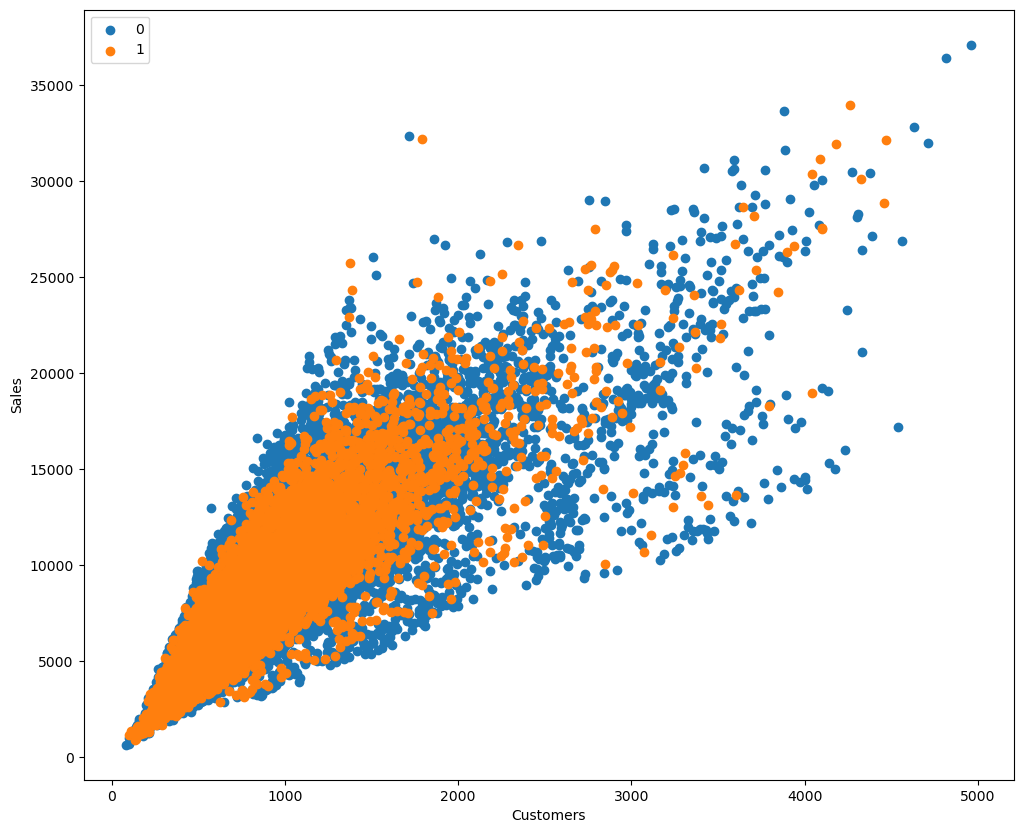

In [10]:
for i in [0, 1]:
    data = train[train['SchoolHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

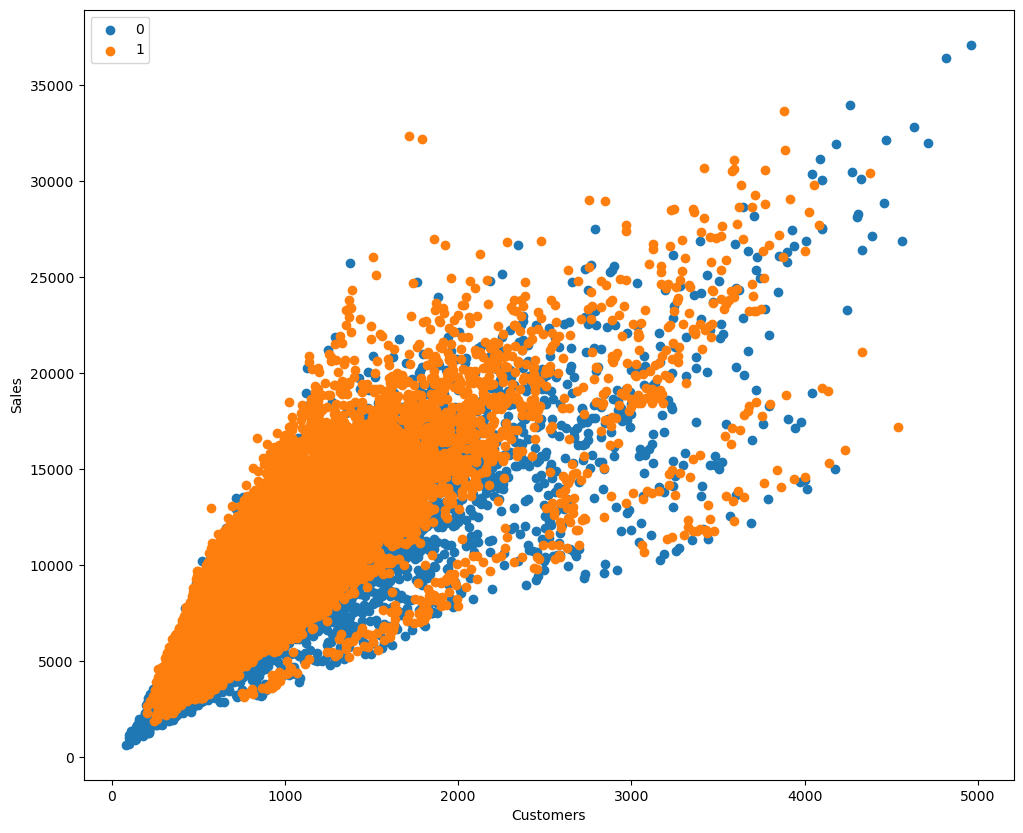

In [11]:

for i in [0, 1]:
    data = train[train['Promo'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

In [12]:
train['SalesPerCustomer'] = train['Sales'] / train['Customers']

avg_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].mean()
avg_store.rename(columns=lambda x: 'Avg' + x, inplace=True)
store = pd.merge(avg_store.reset_index(), store, on='Store')
store.head()

,Store,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5574.037037,644.407407,8.574182,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5593.407407,602.833333,9.132443,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,7560.740741,797.296296,9.363221,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,10730.296296,1424.888889,7.481731,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5313.981481,564.833333,9.273212,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


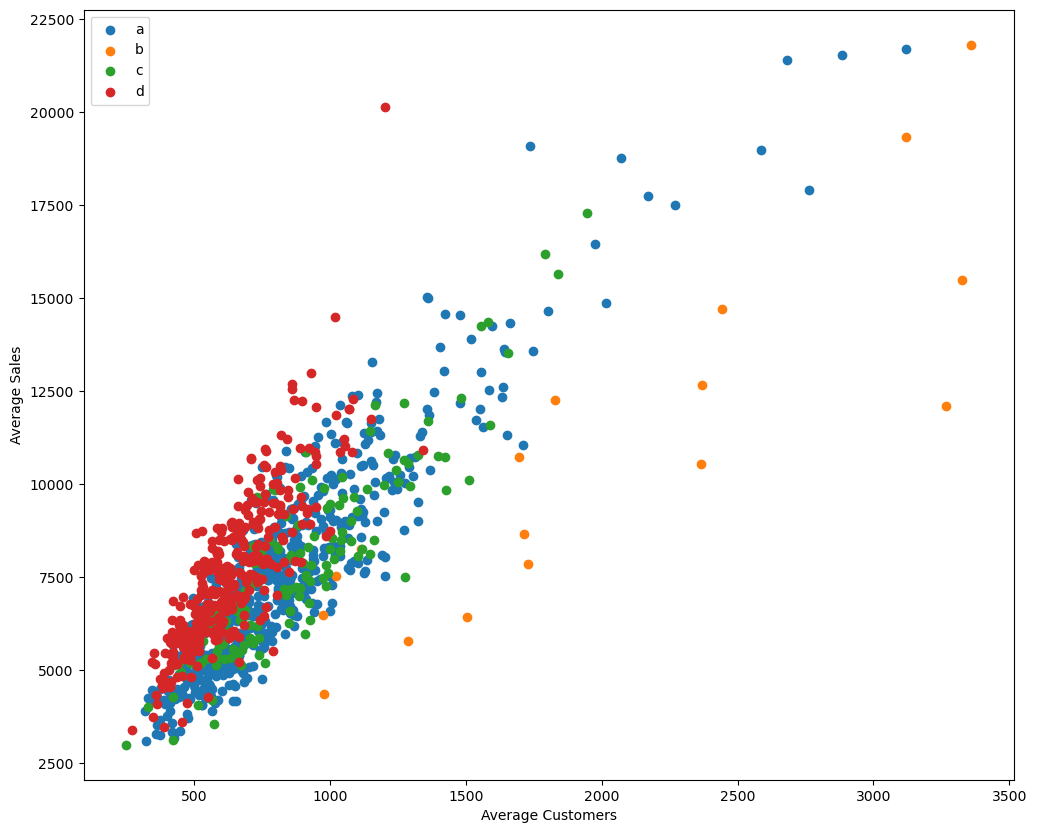

In [13]:
for i in ['a', 'b', 'c', 'd']:
    data = store[store['StoreType'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

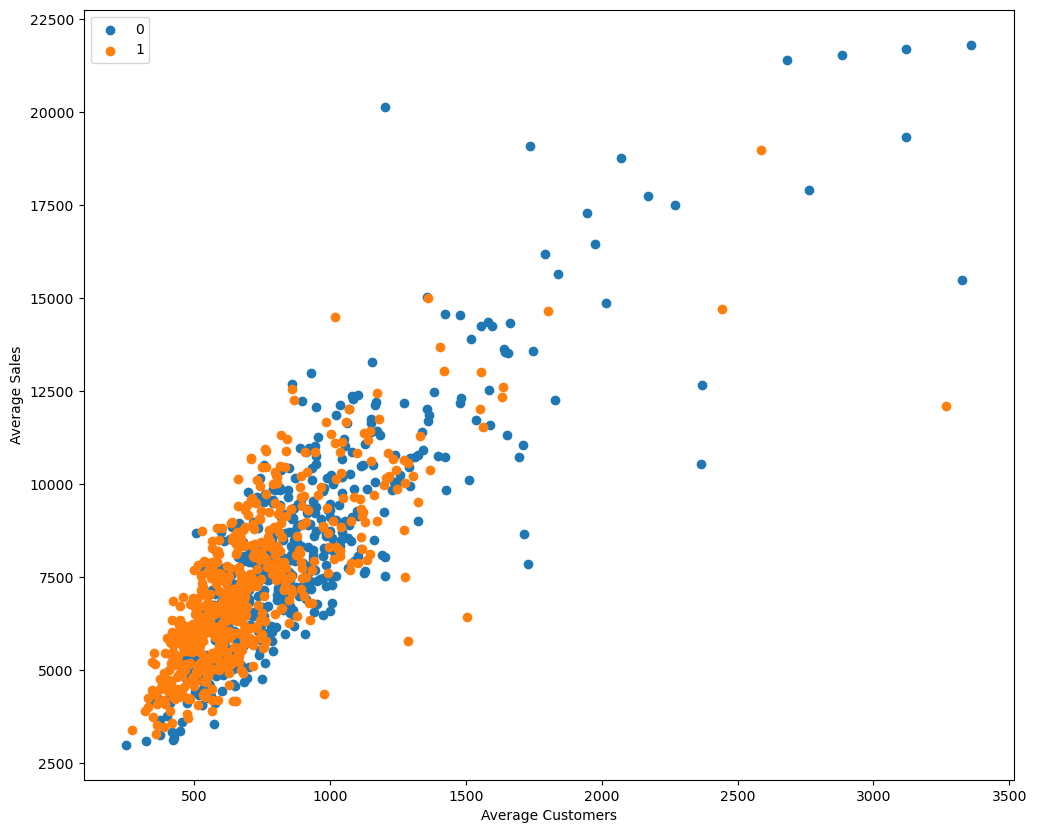

In [14]:
for i in [0, 1]:
    data = store[store['Promo2'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

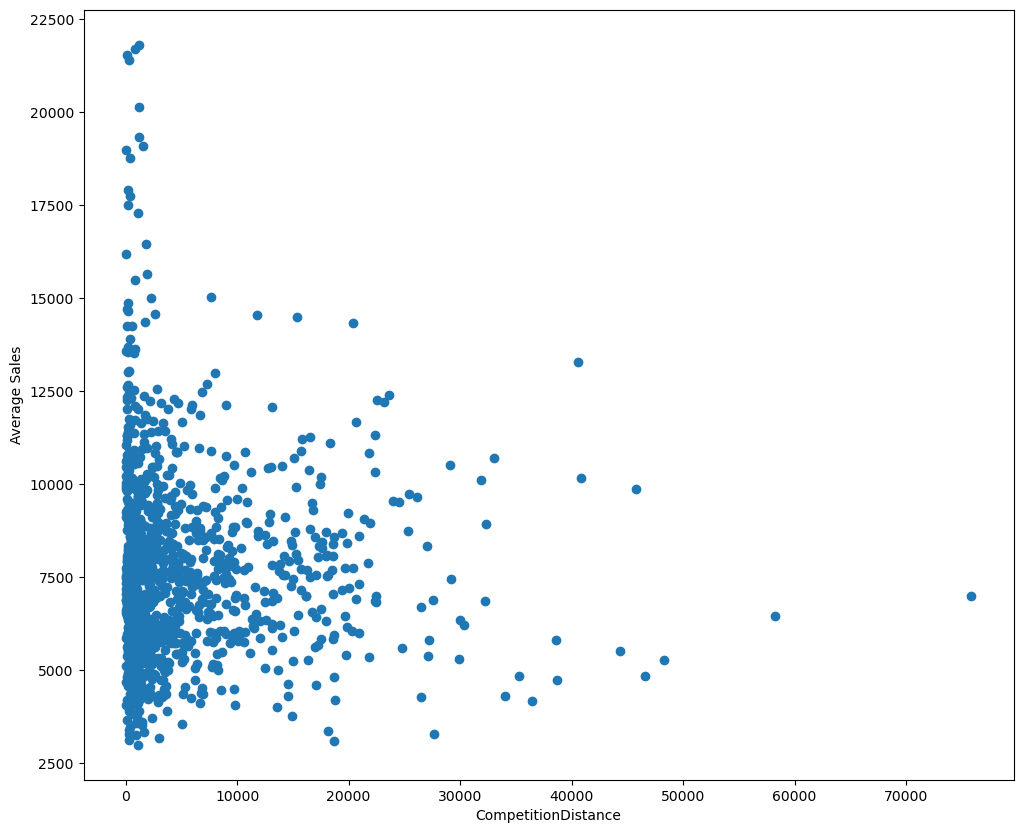

In [15]:
# fill NaN values
store["CompetitionDistance"].fillna(-1)
plt.scatter(store['CompetitionDistance'], store['AvgSales'])

plt.xlabel('CompetitionDistance')
plt.ylabel('Average Sales')
plt.show()

In [16]:
def build_features(train, store):
    # Convert string types into integers
    store['StoreType'] = store['StoreType'].astype('category').cat.codes
    store['Assortment'] = store['Assortment'].astype('category').cat.codes
    train["StateHoliday"] = train["StateHoliday"].astype('category').cat.codes

    merged = pd.merge(train, store, on='Store', how='left')
    
    # remove NaNs
    NaN_replace = 0
    merged.fillna(NaN_replace, inplace=True)
    
    merged['Year'] = merged.Date.dt.year
    merged['Month'] = merged.Date.dt.month
    merged['Day'] = merged.Date.dt.day
    merged['Week'] = merged.Date.dt.week
    
    # Number of months that competition has existed for
    merged['MonthsCompetitionOpen'] = \
        12 * (merged['Year'] - merged['CompetitionOpenSinceYear']) + \
        (merged['Month'] - merged['CompetitionOpenSinceMonth'])
    merged.loc[merged['CompetitionOpenSinceYear'] ==
               NaN_replace, 'MonthsCompetitionOpen'] = NaN_replace
    
    # Number of weeks that promotion has existed for
    merged['WeeksPromoOpen'] = \
        12 * (merged['Year'] - merged['Promo2SinceYear']) + \
        (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])
    merged.loc[merged['Promo2SinceYear'] == 
               NaN_replace, 'WeeksPromoOpen'] = NaN_replace

    toInt = [
        'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear',
        'Promo2SinceWeek', 
        'Promo2SinceYear', 
        'MonthsCompetitionOpen', 
        'WeeksPromoOpen'
    ]
    merged[toInt] = merged[toInt].astype(int)

    return merged

med_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].median()
med_store.rename(columns=lambda x: 'Med' + x, inplace=True)

store = pd.merge(med_store.reset_index(), store, on='Store')
features = build_features(train, store)
features.head()

C:\Users\Sneha\AppData\Local\Temp\ipykernel_19112\760113941.py:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  merged['Week'] = merged.Date.dt.week
C:\Users\Sneha\AppData\Local\Temp\ipykernel_19112\760113941.py:28: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Week,MonthsCompetitionOpen,WeeksPromoOpen
0,1,5,2015-01-30,5577,616,1,1,0,0,9.053571,...,0,0,0,0,2015,1,30,5,76,0
1,2,5,2015-01-30,5919,624,1,1,0,0,9.485577,...,1,13,2010,"Jan,Apr,Jul,Oct",2015,1,30,5,86,52
2,3,5,2015-01-30,6911,678,1,1,0,0,10.193215,...,1,14,2011,"Jan,Apr,Jul,Oct",2015,1,30,5,97,39
3,4,5,2015-01-30,13307,1632,1,1,0,0,8.153799,...,0,0,0,0,2015,1,30,5,64,0
4,5,5,2015-01-30,5640,617,1,1,0,0,9.141005,...,0,0,0,0,2015,1,30,5,-3,0


In [17]:
from sklearn.model_selection import train_test_split
X = [
    'Store', 
    'Customers',
    'CompetitionDistance', 

    'Promo', 
    'Promo2', 

#     'SchoolHoliday',
    'StateHoliday',
    'StoreType',
    'Assortment',

    'AvgSales',
    'AvgCustomers',
    'AvgSalesPerCustomer',

    'DayOfWeek',
    'Week',
    'Day',
    'Month',
    'Year',

    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear',

#     'MonthsCompetitionOpen',
#     'WeeksPromoOpen'
]
X_train, X_test, y_train, y_test = train_test_split(
    features[X], features['Sales'], test_size=0.15, random_state=10)


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Error calculating function according to kaggle
def rmspe(y, y_hat):
    return np.sqrt(np.mean(((y - y_hat) / y) ** 2))

rmpse_scorer = make_scorer(rmspe, greater_is_better = False) # Loss function

def score(model, X_train, y_train, y_test, y_hat):
    score = cross_val_score(model, X_train, y_train, scoring=rmpse_scorer, cv=5)
    print('Mean', score.mean())
    print('Variance', score.var())
    print('RMSPE', rmspe(y_test, y_hat))

def plot_importance(model):
    k = list(zip(X, model.feature_importances_))
    k.sort(key=lambda tup: tup[1])

    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)), vals, align='center')
    plt.yticks(np.arange(len(X)), labels)

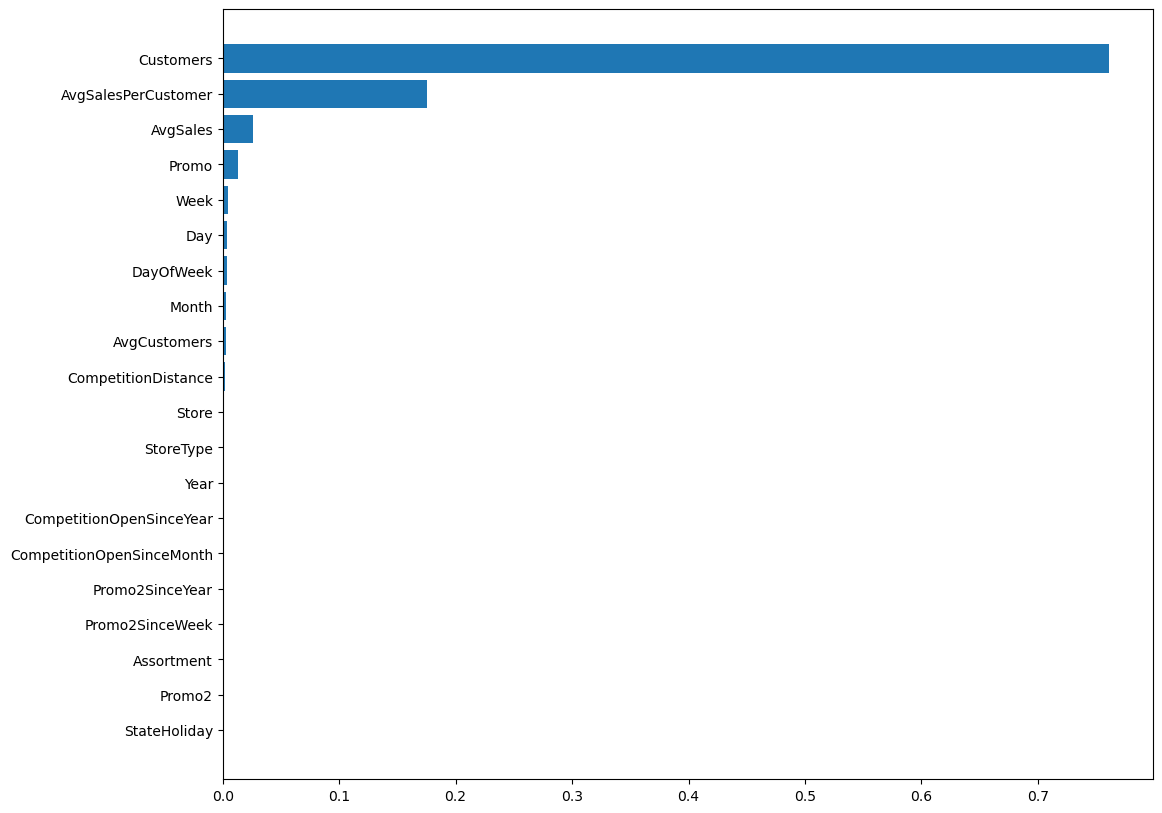

In [20]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
plot_importance(decision_tree)

In [22]:
y_hat = decision_tree.predict(X_test)
score(decision_tree, X_train, y_train, y_test, y_hat)

Mean -0.08507569805683811
Variance 3.519385827682146e-07
RMSPE 0.08309012617574053


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.9s finished


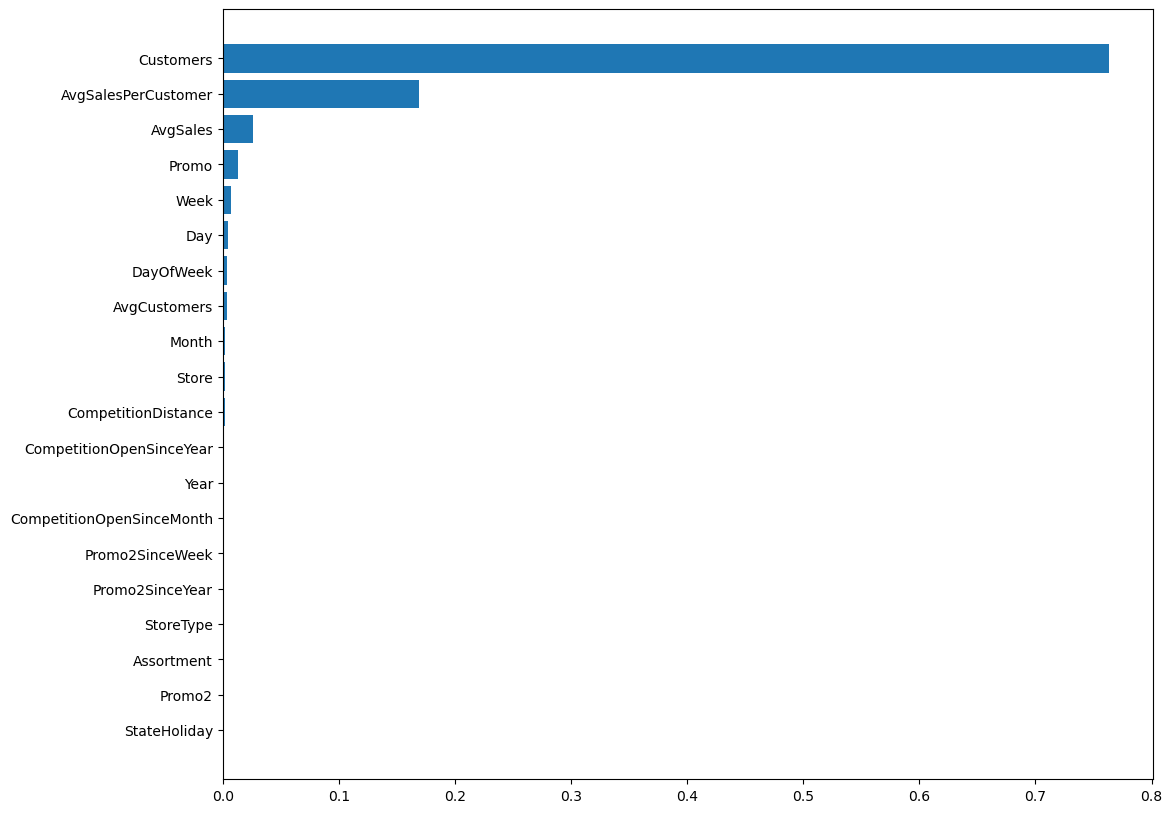

In [23]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(n_estimators=25, n_jobs=-1, verbose=1)
randomForest.fit(X_train, y_train)
plot_importance(randomForest)

In [24]:
y_hat = randomForest.predict(X_test)
score(randomForest, X_train, y_train, y_test, y_hat)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_job

Mean -0.06083757218582485
Variance 5.943451205447654e-07
RMSPE 0.059392326330909906


In [25]:
import xgboost as xgb

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

xgboost_tree = xgb.XGBRegressor(
    n_jobs = -1,
    n_estimators = 1000,
    eta = 0.1,
    max_depth = 2,
    min_child_weight = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)
xgboost_tree.fit(X_train[X], np.log1p(y_train), 
                 eval_set = [(X_train[X], np.log1p(y_train)), (X_test[X], np.log1p(y_test))],
                 eval_metric = rmspe_xg,
                 early_stopping_rounds = 300
                )


[05:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-rmse:7.53662	validation_0-rmspe:0.99957	validation_1-rmse:7.53602	validation_1-rmspe:0.99957
[1]	validation_0-rmse:6.78395	validation_0-rmspe:0.99892	validation_1-rmse:6.78345	validation_1-rmspe:0.99892
[2]	validation_0-rmse:6.10656	validation_0-rmspe:0.99774	validation_1-rmse:6.10601	validation_1-rmspe:0.99775
[3]	validation_0-rmse:5.49704	validation_0-rmspe:0.99575	validation_1-rmse:5.49641	validation_1-rmspe:0.99576
[4]	validation_0-rmse:4.94849	validation_0-rmspe:0.99258	validation_1-rmse:4.94777	validation_1-rmspe:0.99259
[5]	validation_0-rmse:4.45481	validation_0-rmspe:0.98781	validation_1-rmse:4.45399	validation_1-rmspe:0.98783
[6]	validation_0-rmse:4.01109	validation_0-rmspe:0.98096	validation_1-rmse:4.01021	validation_1-rmspe:0.98098
[7]	validation_0-rmse:3.61140	vali

C:\Users\Sneha\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Sneha\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:3.25166	validation_0-rmspe:0.95945	validation_1-rmse:3.25095	validation_1-rmspe:0.95949
[9]	validation_0-rmse:2.92802	validation_0-rmspe:0.94410	validation_1-rmse:2.92732	validation_1-rmspe:0.94414
[10]	validation_0-rmse:2.63684	validation_0-rmspe:0.92537	validation_1-rmse:2.63615	validation_1-rmspe:0.92542
[11]	validation_0-rmse:2.37492	validation_0-rmspe:0.90324	validation_1-rmse:2.37408	validation_1-rmspe:0.90328
[12]	validation_0-rmse:2.13922	validation_0-rmspe:0.87778	validation_1-rmse:2.13828	validation_1-rmspe:0.87780
[13]	validation_0-rmse:1.92723	validation_0-rmspe:0.84922	validation_1-rmse:1.92638	validation_1-rmspe:0.84924
[14]	validation_0-rmse:1.73662	validation_0-rmspe:0.81789	validation_1-rmse:1.73578	validation_1-rmspe:0.81788
[15]	validation_0-rmse:1.56504	validation_0-rmspe:0.78421	validation_1-rmse:1.56407	validation_1-rmspe:0.78416
[16]	validation_0-rmse:1.41080	validation_0-rmspe:0.74864	validation_1-rmse:1.40987	validation_1-rmspe:0.74856
[17

[82]	validation_0-rmse:0.08175	validation_0-rmspe:0.08274	validation_1-rmse:0.08150	validation_1-rmspe:0.08195
[83]	validation_0-rmse:0.08133	validation_0-rmspe:0.08228	validation_1-rmse:0.08105	validation_1-rmspe:0.08145
[84]	validation_0-rmse:0.08097	validation_0-rmspe:0.08187	validation_1-rmse:0.08064	validation_1-rmspe:0.08096
[85]	validation_0-rmse:0.08044	validation_0-rmspe:0.08132	validation_1-rmse:0.08013	validation_1-rmspe:0.08044
[86]	validation_0-rmse:0.08009	validation_0-rmspe:0.08083	validation_1-rmse:0.07984	validation_1-rmspe:0.08008
[87]	validation_0-rmse:0.07961	validation_0-rmspe:0.08038	validation_1-rmse:0.07938	validation_1-rmspe:0.07967
[88]	validation_0-rmse:0.07925	validation_0-rmspe:0.07999	validation_1-rmse:0.07899	validation_1-rmspe:0.07923
[89]	validation_0-rmse:0.07882	validation_0-rmspe:0.07959	validation_1-rmse:0.07857	validation_1-rmspe:0.07881
[90]	validation_0-rmse:0.07844	validation_0-rmspe:0.07911	validation_1-rmse:0.07821	validation_1-rmspe:0.07840
[

[156]	validation_0-rmse:0.06567	validation_0-rmspe:0.06585	validation_1-rmse:0.06578	validation_1-rmspe:0.06572
[157]	validation_0-rmse:0.06555	validation_0-rmspe:0.06573	validation_1-rmse:0.06567	validation_1-rmspe:0.06560
[158]	validation_0-rmse:0.06549	validation_0-rmspe:0.06566	validation_1-rmse:0.06558	validation_1-rmspe:0.06551
[159]	validation_0-rmse:0.06540	validation_0-rmspe:0.06558	validation_1-rmse:0.06549	validation_1-rmspe:0.06542
[160]	validation_0-rmse:0.06531	validation_0-rmspe:0.06548	validation_1-rmse:0.06541	validation_1-rmspe:0.06534
[161]	validation_0-rmse:0.06521	validation_0-rmspe:0.06539	validation_1-rmse:0.06529	validation_1-rmspe:0.06523
[162]	validation_0-rmse:0.06515	validation_0-rmspe:0.06533	validation_1-rmse:0.06522	validation_1-rmspe:0.06516
[163]	validation_0-rmse:0.06506	validation_0-rmspe:0.06524	validation_1-rmse:0.06513	validation_1-rmspe:0.06507
[164]	validation_0-rmse:0.06495	validation_0-rmspe:0.06512	validation_1-rmse:0.06501	validation_1-rmspe:

[230]	validation_0-rmse:0.06106	validation_0-rmspe:0.06114	validation_1-rmse:0.06125	validation_1-rmspe:0.06113
[231]	validation_0-rmse:0.06103	validation_0-rmspe:0.06111	validation_1-rmse:0.06121	validation_1-rmspe:0.06109
[232]	validation_0-rmse:0.06100	validation_0-rmspe:0.06108	validation_1-rmse:0.06118	validation_1-rmspe:0.06105
[233]	validation_0-rmse:0.06095	validation_0-rmspe:0.06102	validation_1-rmse:0.06114	validation_1-rmspe:0.06101
[234]	validation_0-rmse:0.06091	validation_0-rmspe:0.06098	validation_1-rmse:0.06110	validation_1-rmspe:0.06097
[235]	validation_0-rmse:0.06089	validation_0-rmspe:0.06096	validation_1-rmse:0.06107	validation_1-rmspe:0.06094
[236]	validation_0-rmse:0.06083	validation_0-rmspe:0.06089	validation_1-rmse:0.06102	validation_1-rmspe:0.06089
[237]	validation_0-rmse:0.06079	validation_0-rmspe:0.06086	validation_1-rmse:0.06098	validation_1-rmspe:0.06085
[238]	validation_0-rmse:0.06075	validation_0-rmspe:0.06081	validation_1-rmse:0.06093	validation_1-rmspe:

[304]	validation_0-rmse:0.05880	validation_0-rmspe:0.05883	validation_1-rmse:0.05908	validation_1-rmspe:0.05895
[305]	validation_0-rmse:0.05877	validation_0-rmspe:0.05881	validation_1-rmse:0.05905	validation_1-rmspe:0.05892
[306]	validation_0-rmse:0.05874	validation_0-rmspe:0.05878	validation_1-rmse:0.05902	validation_1-rmspe:0.05889
[307]	validation_0-rmse:0.05870	validation_0-rmspe:0.05874	validation_1-rmse:0.05898	validation_1-rmspe:0.05885
[308]	validation_0-rmse:0.05869	validation_0-rmspe:0.05873	validation_1-rmse:0.05896	validation_1-rmspe:0.05884
[309]	validation_0-rmse:0.05867	validation_0-rmspe:0.05871	validation_1-rmse:0.05893	validation_1-rmspe:0.05880
[310]	validation_0-rmse:0.05864	validation_0-rmspe:0.05868	validation_1-rmse:0.05891	validation_1-rmspe:0.05878
[311]	validation_0-rmse:0.05860	validation_0-rmspe:0.05864	validation_1-rmse:0.05887	validation_1-rmspe:0.05875
[312]	validation_0-rmse:0.05858	validation_0-rmspe:0.05862	validation_1-rmse:0.05886	validation_1-rmspe:

[378]	validation_0-rmse:0.05752	validation_0-rmspe:0.05754	validation_1-rmse:0.05781	validation_1-rmspe:0.05769
[379]	validation_0-rmse:0.05750	validation_0-rmspe:0.05753	validation_1-rmse:0.05780	validation_1-rmspe:0.05768
[380]	validation_0-rmse:0.05749	validation_0-rmspe:0.05752	validation_1-rmse:0.05779	validation_1-rmspe:0.05767
[381]	validation_0-rmse:0.05748	validation_0-rmspe:0.05750	validation_1-rmse:0.05777	validation_1-rmspe:0.05765
[382]	validation_0-rmse:0.05746	validation_0-rmspe:0.05748	validation_1-rmse:0.05776	validation_1-rmspe:0.05764
[383]	validation_0-rmse:0.05745	validation_0-rmspe:0.05747	validation_1-rmse:0.05774	validation_1-rmspe:0.05762
[384]	validation_0-rmse:0.05744	validation_0-rmspe:0.05746	validation_1-rmse:0.05774	validation_1-rmspe:0.05762
[385]	validation_0-rmse:0.05742	validation_0-rmspe:0.05744	validation_1-rmse:0.05772	validation_1-rmspe:0.05760
[386]	validation_0-rmse:0.05741	validation_0-rmspe:0.05743	validation_1-rmse:0.05771	validation_1-rmspe:

[452]	validation_0-rmse:0.05674	validation_0-rmspe:0.05675	validation_1-rmse:0.05712	validation_1-rmspe:0.05700
[453]	validation_0-rmse:0.05673	validation_0-rmspe:0.05674	validation_1-rmse:0.05711	validation_1-rmspe:0.05699
[454]	validation_0-rmse:0.05671	validation_0-rmspe:0.05673	validation_1-rmse:0.05709	validation_1-rmspe:0.05698
[455]	validation_0-rmse:0.05671	validation_0-rmspe:0.05672	validation_1-rmse:0.05709	validation_1-rmspe:0.05698
[456]	validation_0-rmse:0.05670	validation_0-rmspe:0.05671	validation_1-rmse:0.05708	validation_1-rmspe:0.05697
[457]	validation_0-rmse:0.05669	validation_0-rmspe:0.05671	validation_1-rmse:0.05708	validation_1-rmspe:0.05696
[458]	validation_0-rmse:0.05668	validation_0-rmspe:0.05670	validation_1-rmse:0.05706	validation_1-rmspe:0.05695
[459]	validation_0-rmse:0.05667	validation_0-rmspe:0.05668	validation_1-rmse:0.05705	validation_1-rmspe:0.05694
[460]	validation_0-rmse:0.05667	validation_0-rmspe:0.05668	validation_1-rmse:0.05705	validation_1-rmspe:

[526]	validation_0-rmse:0.05608	validation_0-rmspe:0.05608	validation_1-rmse:0.05650	validation_1-rmspe:0.05638
[527]	validation_0-rmse:0.05608	validation_0-rmspe:0.05608	validation_1-rmse:0.05650	validation_1-rmspe:0.05638
[528]	validation_0-rmse:0.05607	validation_0-rmspe:0.05607	validation_1-rmse:0.05649	validation_1-rmspe:0.05637
[529]	validation_0-rmse:0.05606	validation_0-rmspe:0.05606	validation_1-rmse:0.05648	validation_1-rmspe:0.05636
[530]	validation_0-rmse:0.05606	validation_0-rmspe:0.05606	validation_1-rmse:0.05648	validation_1-rmspe:0.05635
[531]	validation_0-rmse:0.05605	validation_0-rmspe:0.05605	validation_1-rmse:0.05647	validation_1-rmspe:0.05634
[532]	validation_0-rmse:0.05605	validation_0-rmspe:0.05605	validation_1-rmse:0.05646	validation_1-rmspe:0.05634
[533]	validation_0-rmse:0.05604	validation_0-rmspe:0.05604	validation_1-rmse:0.05646	validation_1-rmspe:0.05634
[534]	validation_0-rmse:0.05603	validation_0-rmspe:0.05603	validation_1-rmse:0.05645	validation_1-rmspe:

[600]	validation_0-rmse:0.05561	validation_0-rmspe:0.05560	validation_1-rmse:0.05609	validation_1-rmspe:0.05597
[601]	validation_0-rmse:0.05561	validation_0-rmspe:0.05560	validation_1-rmse:0.05609	validation_1-rmspe:0.05597
[602]	validation_0-rmse:0.05560	validation_0-rmspe:0.05559	validation_1-rmse:0.05608	validation_1-rmspe:0.05596
[603]	validation_0-rmse:0.05559	validation_0-rmspe:0.05558	validation_1-rmse:0.05607	validation_1-rmspe:0.05595
[604]	validation_0-rmse:0.05559	validation_0-rmspe:0.05558	validation_1-rmse:0.05606	validation_1-rmspe:0.05594
[605]	validation_0-rmse:0.05558	validation_0-rmspe:0.05558	validation_1-rmse:0.05605	validation_1-rmspe:0.05593
[606]	validation_0-rmse:0.05558	validation_0-rmspe:0.05557	validation_1-rmse:0.05605	validation_1-rmspe:0.05593
[607]	validation_0-rmse:0.05557	validation_0-rmspe:0.05557	validation_1-rmse:0.05604	validation_1-rmspe:0.05592
[608]	validation_0-rmse:0.05557	validation_0-rmspe:0.05556	validation_1-rmse:0.05604	validation_1-rmspe:

[674]	validation_0-rmse:0.05524	validation_0-rmspe:0.05523	validation_1-rmse:0.05574	validation_1-rmspe:0.05562
[675]	validation_0-rmse:0.05523	validation_0-rmspe:0.05522	validation_1-rmse:0.05575	validation_1-rmspe:0.05562
[676]	validation_0-rmse:0.05523	validation_0-rmspe:0.05522	validation_1-rmse:0.05574	validation_1-rmspe:0.05562
[677]	validation_0-rmse:0.05522	validation_0-rmspe:0.05521	validation_1-rmse:0.05572	validation_1-rmspe:0.05560
[678]	validation_0-rmse:0.05521	validation_0-rmspe:0.05520	validation_1-rmse:0.05572	validation_1-rmspe:0.05560
[679]	validation_0-rmse:0.05521	validation_0-rmspe:0.05520	validation_1-rmse:0.05572	validation_1-rmspe:0.05560
[680]	validation_0-rmse:0.05520	validation_0-rmspe:0.05520	validation_1-rmse:0.05572	validation_1-rmspe:0.05560
[681]	validation_0-rmse:0.05520	validation_0-rmspe:0.05520	validation_1-rmse:0.05571	validation_1-rmspe:0.05559
[682]	validation_0-rmse:0.05520	validation_0-rmspe:0.05520	validation_1-rmse:0.05571	validation_1-rmspe:

[748]	validation_0-rmse:0.05490	validation_0-rmspe:0.05490	validation_1-rmse:0.05544	validation_1-rmspe:0.05532
[749]	validation_0-rmse:0.05490	validation_0-rmspe:0.05490	validation_1-rmse:0.05544	validation_1-rmspe:0.05532
[750]	validation_0-rmse:0.05489	validation_0-rmspe:0.05489	validation_1-rmse:0.05543	validation_1-rmspe:0.05531
[751]	validation_0-rmse:0.05489	validation_0-rmspe:0.05489	validation_1-rmse:0.05543	validation_1-rmspe:0.05531
[752]	validation_0-rmse:0.05489	validation_0-rmspe:0.05489	validation_1-rmse:0.05543	validation_1-rmspe:0.05531
[753]	validation_0-rmse:0.05489	validation_0-rmspe:0.05488	validation_1-rmse:0.05543	validation_1-rmspe:0.05530
[754]	validation_0-rmse:0.05488	validation_0-rmspe:0.05488	validation_1-rmse:0.05542	validation_1-rmspe:0.05530
[755]	validation_0-rmse:0.05488	validation_0-rmspe:0.05488	validation_1-rmse:0.05542	validation_1-rmspe:0.05530
[756]	validation_0-rmse:0.05488	validation_0-rmspe:0.05488	validation_1-rmse:0.05542	validation_1-rmspe:

[822]	validation_0-rmse:0.05460	validation_0-rmspe:0.05460	validation_1-rmse:0.05518	validation_1-rmspe:0.05505
[823]	validation_0-rmse:0.05460	validation_0-rmspe:0.05460	validation_1-rmse:0.05518	validation_1-rmspe:0.05505
[824]	validation_0-rmse:0.05460	validation_0-rmspe:0.05459	validation_1-rmse:0.05518	validation_1-rmspe:0.05505
[825]	validation_0-rmse:0.05460	validation_0-rmspe:0.05459	validation_1-rmse:0.05518	validation_1-rmspe:0.05505
[826]	validation_0-rmse:0.05460	validation_0-rmspe:0.05459	validation_1-rmse:0.05518	validation_1-rmspe:0.05505
[827]	validation_0-rmse:0.05459	validation_0-rmspe:0.05458	validation_1-rmse:0.05518	validation_1-rmspe:0.05505
[828]	validation_0-rmse:0.05459	validation_0-rmspe:0.05458	validation_1-rmse:0.05518	validation_1-rmspe:0.05505
[829]	validation_0-rmse:0.05458	validation_0-rmspe:0.05458	validation_1-rmse:0.05518	validation_1-rmspe:0.05505
[830]	validation_0-rmse:0.05458	validation_0-rmspe:0.05457	validation_1-rmse:0.05518	validation_1-rmspe:

[896]	validation_0-rmse:0.05435	validation_0-rmspe:0.05435	validation_1-rmse:0.05497	validation_1-rmspe:0.05484
[897]	validation_0-rmse:0.05435	validation_0-rmspe:0.05435	validation_1-rmse:0.05497	validation_1-rmspe:0.05484
[898]	validation_0-rmse:0.05435	validation_0-rmspe:0.05434	validation_1-rmse:0.05497	validation_1-rmspe:0.05484
[899]	validation_0-rmse:0.05435	validation_0-rmspe:0.05434	validation_1-rmse:0.05497	validation_1-rmspe:0.05484
[900]	validation_0-rmse:0.05434	validation_0-rmspe:0.05434	validation_1-rmse:0.05496	validation_1-rmspe:0.05483
[901]	validation_0-rmse:0.05434	validation_0-rmspe:0.05434	validation_1-rmse:0.05496	validation_1-rmspe:0.05483
[902]	validation_0-rmse:0.05434	validation_0-rmspe:0.05434	validation_1-rmse:0.05496	validation_1-rmspe:0.05483
[903]	validation_0-rmse:0.05434	validation_0-rmspe:0.05434	validation_1-rmse:0.05496	validation_1-rmspe:0.05483
[904]	validation_0-rmse:0.05433	validation_0-rmspe:0.05433	validation_1-rmse:0.05496	validation_1-rmspe:

[970]	validation_0-rmse:0.05411	validation_0-rmspe:0.05411	validation_1-rmse:0.05477	validation_1-rmspe:0.05464
[971]	validation_0-rmse:0.05411	validation_0-rmspe:0.05410	validation_1-rmse:0.05477	validation_1-rmspe:0.05463
[972]	validation_0-rmse:0.05411	validation_0-rmspe:0.05410	validation_1-rmse:0.05477	validation_1-rmspe:0.05463
[973]	validation_0-rmse:0.05411	validation_0-rmspe:0.05410	validation_1-rmse:0.05476	validation_1-rmspe:0.05463
[974]	validation_0-rmse:0.05410	validation_0-rmspe:0.05409	validation_1-rmse:0.05476	validation_1-rmspe:0.05463
[975]	validation_0-rmse:0.05410	validation_0-rmspe:0.05409	validation_1-rmse:0.05476	validation_1-rmspe:0.05462
[976]	validation_0-rmse:0.05410	validation_0-rmspe:0.05409	validation_1-rmse:0.05475	validation_1-rmspe:0.05462
[977]	validation_0-rmse:0.05410	validation_0-rmspe:0.05409	validation_1-rmse:0.05476	validation_1-rmspe:0.05462
[978]	validation_0-rmse:0.05409	validation_0-rmspe:0.05409	validation_1-rmse:0.05475	validation_1-rmspe:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=2, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, predictor=None, ...)

Note that this is not in percentage, thus not to scale of graphs above


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

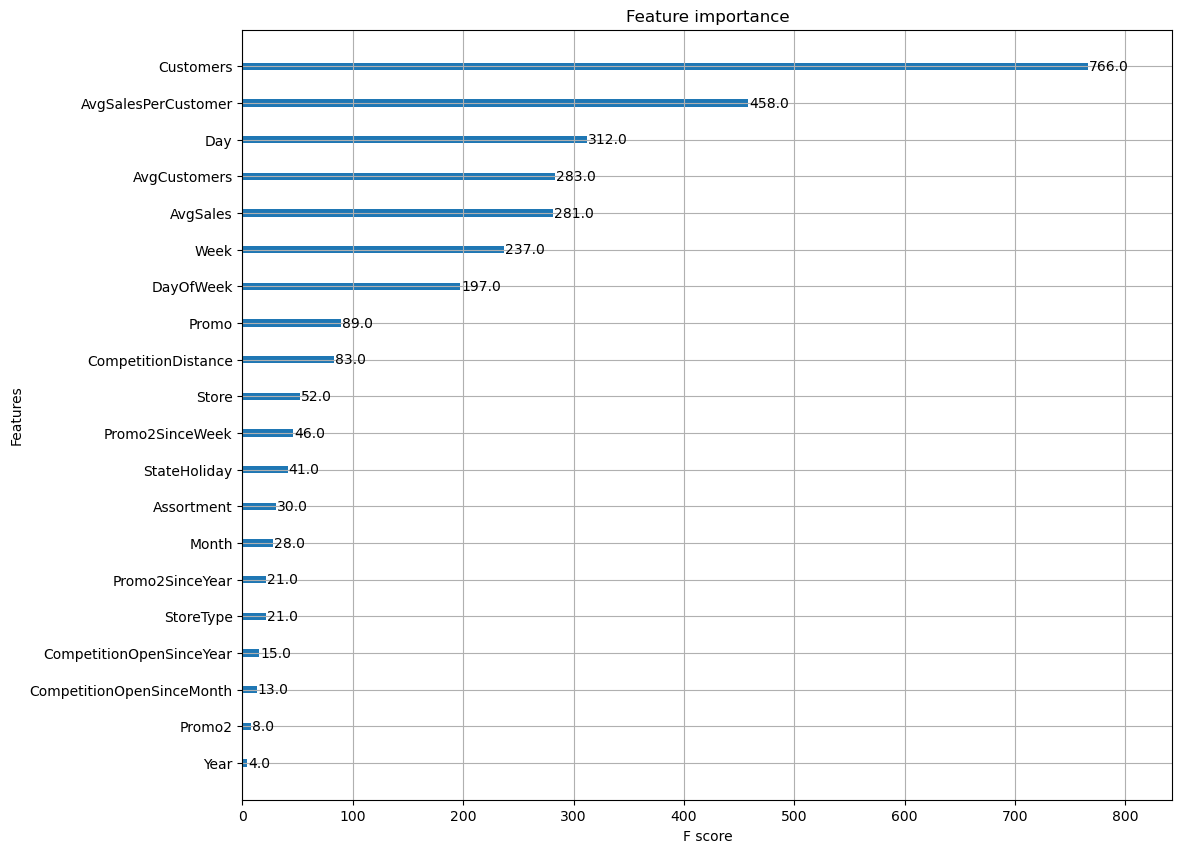

In [26]:
print("Note that this is not in percentage, thus not to scale of graphs above")
xgb.plot_importance(xgboost_tree)

In [27]:
def rmspe_exp(y, y_hat):
    return rmspe(np.expm1(y), np.expm1(y_hat))

rmpse_xg_scorer = make_scorer(rmspe_exp, greater_is_better = False) # Loss function

def score(model, X_train, y_train, y_test, y_hat):
    score = cross_val_score(model, X_train, y_train, scoring=rmpse_xg_scorer, cv=5)
    print('Mean', score.mean())
    print('Variance', score.var())
    print('RMSPE', rmspe(y_test, np.expm1(y_hat)))

y_hat = xgboost_tree.predict(X_test[X])
score(xgboost_tree, X_train[X], np.log1p(y_train), y_test, y_hat)

[05:34:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[05:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[05:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[05:35:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[05:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

Mean -0.055546012178

In [32]:
test = pd.read_csv("C:\\Users\\Sneha\\Downloads\\test.csv", parse_dates=[2], dtype=types)
features = build_features(test, store)

y_hat = np.expm1(xgboost_tree.predict(features[X]))

df = pd.DataFrame({"Id": range(1, len(test) + 1), 'Sales': y_hat})
df.loc[test['Open'] == 0, 'Sales'] = 1
df.to_csv('sales.csv', index=False)


C:\Users\Sneha\AppData\Local\Temp\ipykernel_19112\760113941.py:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  merged['Week'] = merged.Date.dt.week
C:\Users\Sneha\AppData\Local\Temp\ipykernel_19112\760113941.py:28: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])
